In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm

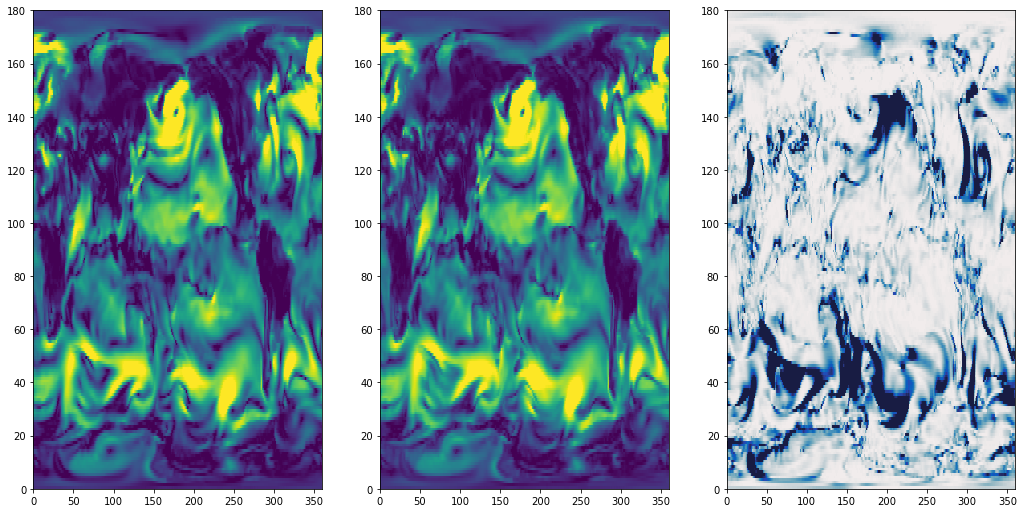

In [8]:
tdir = '/gpfs/data/greenocean/software/products/windsFromComponents/UKESM_monthly_atdayres/'
uwind = xr.open_dataset(f'{tdir}/UKESM_1A_y1940m01_uwind10m_daily_rg.nc')
vwind = xr.open_dataset(f'{tdir}/UKESM_1A_y1940m01_vwind10m_daily_rg.nc')
wspd = xr.open_dataset(f'{tdir}/UKESM_1A_y1940m01_wspd10m_daily_rg.nc')
bothhrly = xr.open_dataset(f'{tdir}/UKESM_1A_wind_y1940m01_rg.nc')

uwind_d1 = bothhrly.uwind10m[0:8,:,:].values
vwind_d1 = bothhrly.vwind10m[0:8,:,:].values
wspd_d1 = np.nanmean(np.sqrt(uwind_d1**2 + vwind_d1**2), axis = 0)
wspd_fromdaily = wspd.wspd10m[0,:,:].values


fact = 1.1
fig, axs = plt.subplots(1,3, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmi = 1; tma = 13
w = axs[0].pcolormesh(wspd_fromdaily, vmin = tmi, vmax = tma)
w2 = axs[1].pcolormesh(wspd_d1, vmin = tmi, vmax = tma)
w3 = axs[2].pcolormesh(wspd_fromdaily-wspd_d1, vmin = -1, vmax = 1, cmap = cm.cm.balance)

In [9]:
# import xarray as xr 
# import numpy as np
# import glob
# import os

# tdir = '/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/'
# dir_1H = 'hist/u-bc370_hist/'
# dir_2H = 'hist/u-cj198_hist_1950start1950ozone/'
# dir_3H = 'hist/u-cj200_hist_1990start1990ozone/'

# dir_1FA = 'ssp126/u-be682_ssp126/'
# dir_1FB = 'ssp370/u-ce417_ssp370/'

# dir_2FA = 'ssp126/u-cj880_ssp126_1950start1950ozone/'
# dir_2FB = 'ssp370/u-cj881_ssp370_1950start1950ozone/'

# dir_3FA = 'ssp126/u-cj484_ssp126_1990start1990ozone/'
# dir_3FB = 'ssp370/u-cj504_ssp370_1990start1990ozone/'

# dir_PI = '/gpfs/data/greenocean/software/resources/MetProcessed-PI/u-aw310_pictrl'

# newdir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/'
# ##1A
# mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

# def do_symlinks(wx2,scen,y,newdir,mons):
    
#     for i in range(0,12):
#         src = (wx2[i])
#         dst = f'{newdir}scen{scen}_wind_y{y}m{mons[i]}.nc'
#         print(src)
#         print(dst)
#         try:
#             os.symlink(src, dst)
#         except:
#             print(f'{scen}{y}{mons[i]}')
            
# def do_symlinks_PI(wx2,scen,y,newdir,mons):
    
#     for i in range(0,12):
#         src = (wx2[i])
#         dst = f'{newdir}scenPI_wind_y{y}m{mons[i]}.nc'
# #         print(src)
# #         print(dst)
#         try:
#             os.symlink(src, dst)
#         except:
#             print(f'{scen}{y}{mons[i]}')
            
# scen = 'PI'
# for y in range(1950,2101):

#     fdir = '/gpfs/data/greenocean/software/products/MetOffice/u-aw310_pictrl/'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y+270}*')
#     wx2 = np.sort(wx)#wx.sort()
#     do_symlinks_PI(wx2,scen,y,newdir,mons)

In [10]:
import xarray as xr 
import numpy as np
import glob
import os

tdir = '/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/'
dir_1H = 'hist/u-bc370_hist/'
dir_2H = 'hist/u-cj198_hist_1950start1950ozone/'
dir_3H = 'hist/u-cj200_hist_1990start1990ozone/'

dir_1FA = 'ssp126/u-be682_ssp126/'
dir_1FB = 'ssp370/u-ce417_ssp370/'

dir_2FA = 'ssp126/u-cj880_ssp126_1950start1950ozone/'
dir_2FB = 'ssp370/u-cj881_ssp370_1950start1950ozone/'

dir_3FA = 'ssp126/u-cj484_ssp126_1990start1990ozone/'
dir_3FB = 'ssp370/u-cj504_ssp370_1990start1990ozone/'

newdir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/'
##1A
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

def do_symlinks(wx2,scen,y,newdir,mons):
    
    for i in range(0,12):
        src = (wx2[i])
        dst = f'{newdir}scen{scen}_wind_y{y}m{mons[i]}.nc'
        print(src)
        print(dst)
        try:
            os.symlink(src, dst)
        except:
            print(f'{scen}{y}{mons[i]}')
            
# scen = '1A'
# for y in range(1940,2101):
#     if y < 2015:
#         dir2 = dir_1H
#     if y >= 2015:
#         dir2 = dir_1FA
#     fdir = f'{tdir}{dir2}'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y}*')
#     wx2 = np.sort(wx)#wx.sort()
#     do_symlinks(wx2,scen,y,newdir,mons)

# scen = '1B'
# print()
# print(scen)
# for y in range(1940,2101):
#     if y < 2015:
#         dir2 = dir_1H
#     if y >= 2015:
#         dir2 = dir_1FB
#     fdir = f'{tdir}{dir2}'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y}*')
#     wx2 = np.sort(wx)#wx.sort()
#     do_symlinks(wx2,scen,y,newdir,mons)

# scen = '2A'
# for y in range(1940,2101):
#     if y < 1950:
#         dir2 = dir_1H
#         print(dir2)
#     if (y < 2015) & (y>=1950):
#         dir2 = dir_2H
#     if y >= 2015:
#         dir2 = dir_2FA
#     fdir = f'{tdir}{dir2}'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y}*')
#     wx2 = np.sort(wx)#wx.sort()
#     do_symlinks(wx2,scen,y,newdir,mons)

scen = '2B'
print()
print(scen)
for y in range(1940,2101):
    if y < 1950:
        dir2 = dir_1H
        print(dir2)
    if (y < 2015) & (y>=1950):
        dir2 = dir_2H
    if y >= 2015:
        dir2 = dir_2FB
    fdir = f'{tdir}{dir2}'
    print(y)
    wx = glob.glob(f'{fdir}/*wind*y{y}*')
    wx2 = np.sort(wx)#wx.sort()
    do_symlinks(wx2,scen,y,newdir,mons)
    
# scen = '3A'
# for y in range(1940,2101):
#     if y < 1990:
#         dir2 = dir_1H
#     if (y>=1990) & (y < 2015):
#         dir2 = dir_3H
#     if y >= 2015:
#         dir2 = dir_3FA
#     fdir = f'{tdir}{dir2}'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y}*')
#     wx2 = np.sort(wx)#wx.sort()
#     do_symlinks(wx2,scen,y,newdir,mons)
# ##1A

# scen = '3B'
# for y in range(1940,2101):
#     if y < 1990:
#         dir2 = dir_1H
#     if (y>=1990) & (y < 2015):
#         dir2 = dir_3H
#     if y >= 2015:
#         dir2 = dir_3FB
#     fdir = f'{tdir}{dir2}'
#     print(y)
#     wx = glob.glob(f'{fdir}/*wind*y{y}*')
#     wx2 = np.sort(wx)
#     do_symlinks(wx2,scen,y,newdir,mons)


2B
hist/u-bc370_hist/
1940
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1940m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1940m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1940m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1940m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1940m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1940m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1940m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1940m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1940m05.nc
/gpfs/data/greenocean/software/p

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1946m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1946m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1946m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1946m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1946m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1946m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1946m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1946m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-bc370_hist/bc370_wind_y1946m05.nc
/gpfs/data/greenocean/software/products/windsFromComponents/

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1951m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1951m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1951m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1951m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1951m05.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1951m05.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1951m06.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1951m06.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1956m07.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1956m07.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1956m08.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1956m08.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1956m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1956m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1956m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1956m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1961m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1961m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1961m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1961m12.nc
1962
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1962m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1962m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1962m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1962m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_19

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1967m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1967m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1967m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1967m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1967m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1967m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1967m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1967m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1973m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1973m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1973m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1973m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1973m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1973m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1973m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1973m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1979m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1979m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1979m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1979m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1979m05.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1979m05.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1979m06.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1979m06.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1987m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1987m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1987m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1987m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1987m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1987m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1987m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1987m12.nc
1988
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_19

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1993m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1993m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1993m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1993m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1993m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1993m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1993m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1993m12.nc
1994
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_19

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1999m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1999m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1999m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1999m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1999m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1999m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y1999m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y1999m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2006m08.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2006m08.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2006m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2006m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2006m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2006m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2006m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2006m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2012m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2012m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2012m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2012m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2012m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2012m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950start1950ozone/cj198_wind_y2012m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2012m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/hist/u-cj198_hist_1950sta

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2016m07.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2016m07.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2016m08.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2016m08.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2016m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2016m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2016m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2016m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2023m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2023m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2023m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2023m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2023m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2023m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2023m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2023m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2030m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2030m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2030m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2030m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2030m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2030m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2030m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2030m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2037m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2037m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2037m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2037m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2037m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2037m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2037m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2037m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2043m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2043m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2043m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2043m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2043m05.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2043m05.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2043m06.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2043m06.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2049m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2049m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2049m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2049m12.nc
2050
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2050m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2050m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2050m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2050m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp3

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2054m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2054m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2054m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2054m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2054m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2054m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2054m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2054m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2059m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2059m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2059m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2059m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2059m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2059m12.nc
2060
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2060m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2060m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp3

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2064m07.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2064m07.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2064m08.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2064m08.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2064m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2064m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2064m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2064m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2069m11.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2069m11.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2069m12.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2069m12.nc
2070
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2070m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2070m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2070m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2070m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp3

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2075m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2075m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2075m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2075m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2075m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2075m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2075m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2075m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2080m07.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2080m07.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2080m08.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2080m08.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2080m09.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2080m09.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2080m10.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2080m10.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2085m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2085m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2085m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2085m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2085m05.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2085m05.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2085m06.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2085m06.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2091m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2091m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2091m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2091m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2091m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2091m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2091m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2091m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2099m01.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2099m01.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2099m02.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2099m02.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2099m03.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2099m03.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-cj881_ssp370_1950start1950ozone/cj881_wind_y2099m04.nc
/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y2099m04.nc
/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp370/u-

In [11]:
# import os

# orgdir = f'/gpfs/data/greenocean/software/products/MetOffice/u-aw310_pictrl/'
# dstdir = f'/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM'
# expname = 'aw310'
# print(f'making symlinks from')
# print(orgdir)
# print('to')
# print(dstdir)
# print()

# yrs = np.arange(2220,2371,1)

# for y in range(0,len(yrs)):
#     print(y)
#     n = 0; yr = yrs[y]
#     w = glob.glob(f'{orgdir}*{yr}*.nc')
# #     print(w)

#     for i in range(0,len(w)):
#         tfil = w[i]
#         #print(f'old file is {tfil}')
#         newfil = tfil.replace(orgdir,'')
#         newfil = newfil.replace(expname,'met')
#         #print(f'new file is {newfil}')
#         src = tfil
#         #print(src)
#         dst = f'{dstdir}{newfil}'
#         #print(dst)
#         try:
#             os.symlink(src, dst)
#         except:
#             #print('no')
#             n = n+1

In [12]:
tdir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/'

tu = '10m_u_component_of_wind_ERA5_1941.nc'
tv = '10m_v_component_of_wind_ERA5_1941.nc'
twind = '10m_windspeed_ERA5_1941.nc'

tuf = xr.open_dataset(f'{tdir}{tu}')
tvf = xr.open_dataset(f'{tdir}{tv}')
twf = xr.open_dataset(f'{tdir}{twind}')
    
ut = tuf.u10[0,10,10].values
vt = tvf.v10[0,10,10].values
wt = twf.windspeed[0,10,10].values
print(np.sqrt(ut**2 + vt**2))
print(wt)

FileNotFoundError: [Errno 2] No such file or directory: b'/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/10m_u_component_of_wind_ERA5_1941.nc'

In [ ]:
tdir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/'

mons = ['01','02','03','04','05','06','07','08','09','10','11','12']
scens = ['1A','1B','2A','2B','3A','3B']

for s in scens:
    for y in range(1940,1941):
        for i in range(0,12):
            uwi = xr.open_dataset(f'{tdir}scen{s}_wind_y{y}m{mons[i]}_rg.nc')
            #vwi = xr.open_dataset(f'{tdir}UKESM_{s}_y{y}m{mons[m]}_vwind10m_daily_rg.nc')
            tnam = f'{tdir}/daily/UKESM_{s}_y{y}m{mons[i]}_wspd10m_daily_rg.nc'
#             print(tnam)
            wspd = xr.ufuncs.sqrt(uwi.uwind10m**2 + uwi.vwind10m**2)
            wspd.name = 'wspd10m'
            w4 = wspd.groupby('time_counter.day').mean()
            w5 = w4.to_dataset()
            w5['day'] = np.arange(i*30+1,(i+1)*30+1,1)
            w5.attrs = {'made in': '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/UKESMwspd-from-regrid-highres.py'}
            w5.to_netcdf(tnam)


In [ ]:
w

## get 95 percentile

In [ ]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)



In [ ]:
import time
t1 = time.time()
w = xr.open_dataset(f'{tdir}/UKESM_1A_y1940m01_wspd10m_daily_rg.nc')
mask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
maskval = mask.aream2[10,:,:].values
tmask = mask.aream2[10,0:60,:].values

at95 = np.zeros([30])
above95 = np.zeros([30])
above95wt = np.zeros([30])

for i in range(0,30):
    twspd = w.wspd10m[i,0:60,:]
    
    where0 = np.where(tmask == 0)
    twspd2 = np.copy(twspd)
    twspd2[np.where(tmask == 0)] = np.nan
    perc95 = weighted_quantile(np.ravel(twspd), 0.95, \
                               sample_weight=np.ravel(tmask))
    at95[i] = perc95
    tmask2 = np.copy(tmask)
    s = twspd2[twspd2>perc95]
    q = np.where(twspd2 < perc95)
    tmask2[q] = 0
    above95wt[i] = np.average(np.ravel(twspd), weights = np.ravel(tmask2))
    above95[i] = np.nanmean(twspd2[twspd2>perc95])

day = np.arange(1,31,1)
savenam = f'{tdir}/UKESM_1A_y1940m01_wspd10m_extremas.nc'
data_vars = {'at95':(['day'], at95,
{'long_name':'weighted 95th percentile of winds'}),
             'above95':(['day'], above95,
{'long_name':'unweighted mean of all winds above 95th percentile'}),
             'above95wt':(['day'], above95wt,
{'long_name':'weighted mean of all winds above 95th percentile'}),
            
            }
# define coordinates
coords = {'day': (['day'], day),
        }
# define global attributes
attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
'desc': 'yearly medusa files, saving only variables of interest'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.to_netcdf(savenam)
    
t2 = time.time()
print(t2-t1)

In [ ]:
plt.plot(ds.at95.values)
plt.plot(ds.above95.values)
plt.plot(ds.above95wt.values)

In [ ]:
w.lat[0:60]

In [ ]:
twspd = w.wspd10m[i,0:60,:]
tmask = mask.aream2[10,0:60,:].values
where0 = np.where(tmask == 0)
twspd2 = np.copy(twspd)
twspd2[np.where(tmask == 0)] = np.nan


fact = 1.1
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].pcolormesh(twspd)
axs[1].pcolormesh(tmask)
axs[2].pcolormesh(twspd2)

In [ ]:
t1 = time.time()
w = xr.open_dataset('/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily/10m_windspeed_ERA5_1943-daily-rg.nc')
tlen = (len(w.time))

at95 = np.zeros([tlen])
above95 = np.zeros([tlen])
above95wt = np.zeros([tlen])

for i in range(0,len(w.time)):
    twspd = w.windspeed[i,0:60,:]
    
    where0 = np.where(tmask == 0)
    twspd2 = np.copy(twspd)
    twspd2[np.where(tmask == 0)] = np.nan
    perc95 = weighted_quantile(np.ravel(twspd), 0.95, \
                               sample_weight=np.ravel(tmask))
    at95[i] = perc95
    tmask2 = np.copy(tmask)
    s = twspd2[twspd2>perc95]
    q = np.where(twspd2 < perc95)
    tmask2[q] = 0
    above95wt[i] = np.average(np.ravel(twspd), weights = np.ravel(tmask2))
    above95[i] = np.nanmean(twspd2[twspd2>perc95])


data_vars = {'at95':(['time'], at95,
{'long_name':'weighted 95th percentile of winds'}),
             'above95':(['time'], above95,
{'long_name':'unweighted mean of all winds above 95th percentile'}),
             'above95wt':(['time'], above95wt,
{'long_name':'weighted mean of all winds above 95th percentile'}),
            
            }
# define coordinates
coords = {'time': (['time'], w.time),
        }
# define global attributes
attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
'desc': 'yearly medusa files, saving only variables of interest'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
# ds.to_netcdf(savenam)
    
t2 = time.time()
print(t2-t1)

In [ ]:
ds